In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_big = pd.read_csv('Train_bigmart.csv')
#train_big

train_big['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [3]:
test_big = pd.read_csv('Test_bigmart.csv')
test_big.head()
#train_big
#fig = plt.figure(figsize=(20,5) )
#ax0 = fig.add_subplot(2, 2, 1)
#ax1 = fig.add_subplot(2, 2, 2)
#ax2 = fig.add_subplot(2, 2, 1)
#train_big['Item_Outlet_Sales'].plot(kind='box',ax=ax0)
#train_big['Item_MRP'].plot(kind='box',ax=ax1)
#plt.scatter(train_big['Item_MRP'],train_big['Item_Outlet_Sales'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#train_big['Item_Weight'].plot(kind = 'box' )
train_big['Item_Weight'].fillna(train_big['Item_Weight'].mean(), inplace = True)
#train_big['Item_Weight'].plot(kind = 'bar',figsize = (20,20 ))

test_big['Item_Weight'].fillna(train_big['Item_Weight'].mean(), inplace = True)
#train_big['Item_Weight'].describe()

In [5]:
ifc = {'Low Fat':'Low Fat' ,'Regular':'Regular' ,'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'}

In [6]:
train_big['Item_Fat_Content'] = [ifc[item] for item in train_big['Item_Fat_Content']]
train_big['Item_Fat_Content'].value_counts()

test_big['Item_Fat_Content'] = [ifc[item] for item in test_big['Item_Fat_Content']]
test_big['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#le = LabelEncoder()
#train_big['Item_Fat_Content'] = le.fit_transform(train_big['Item_Fat_Content'])
#oe = OneHotEncoder

train_big['Item_Fat_Content'] = train_big.groupby('Item_Fat_Content')['Item_Outlet_Sales'].transform('mean')
#test_big['Item_Fat_Content'] = test_big.groupby('Item_Fat_Content')['Item_Outlet_Sales'].transform('mean')
# enco = train_big.groupby('Item_Fat_Content').size()
# print(enco)
# enco = enco/len(train_big)
# train_big['Item_Fat_Content'] = train_big['Item_Fat_Content'].map(enco)

#train_big['Item_Fat_Content'].value_counts()
#fat = pd.get_dummies(train_big['Item_Fat_Content'])
# train_big['Item_Fat_Content'].unique()

ifc = {'Low Fat':2157.711534 ,'Regular':2224.561170}
test_big['Item_Fat_Content'] = [ifc[item] for item in test_big['Item_Fat_Content']]
#test_big['Item_Fat_Content']

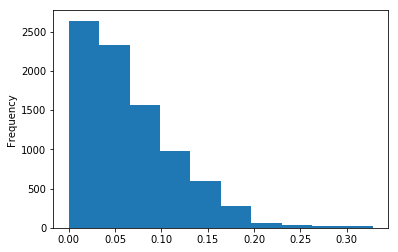

In [8]:
train_big['Item_Visibility'].plot(kind = 'hist')

In [9]:
train_big['Item_Visibility'] =train_big['Item_Visibility'].replace(0,train_big['Item_Visibility'].mean())
test_big['Item_Visibility'] = test_big['Item_Visibility'].replace(0,test_big['Item_Visibility'].mean())
# u,l = np.percentile(train_big['Item_Visibility'],[1,99])
# y = np.clip(train_big['Item_Visibility'],u,l)
# pd.Series(y).plot(kind = 'box')
# item_visi = pd.DataFrame(y,columns=['Item_Visibility'])
# #item_visi
# train_big['Item_Visibility'] = item_visi
# #train_big['Item_Visibility'].plot(kind='box')

# u,l = np.percentile(train_big['Item_Visibility'],[1,99])
# y = np.clip(test_big['Item_Visibility'],u,l)
# pd.Series(y).plot(kind = 'box')
# item_visi = pd.DataFrame(y,columns=['Item_Visibility'])
# test_big['Item_Visibility'] = item_visi


In [10]:
# train_big['Item_Type'].value_counts()
# enco = train_big.groupby('Item_Type').size()
# #print(enco)
# enco = enco/len(train_big)
# train_big['Item_Type'] = train_big['Item_Type'].map(enco)
# train_big['Item_Type'].unique()
train_big['Item_Type'] = train_big.groupby('Item_Type')['Item_Outlet_Sales'].transform('mean')
#test_big['Item_Type'] = test_big.groupby('Item_Type')['Item_Outlet_Sales'].transform('mean')
train_big['Item_Type'].value_counts()

2289.009592    1232
2277.321739    1200
2258.784300     910
2132.867744     856
2232.542597     682
2225.194904     649
1952.971207     648
2010.000265     520
2006.511735     445
2158.977911     425
2204.132226     251
2139.221622     214
1926.139702     169
2374.332773     148
2111.808651     110
2326.065928      64
Name: Item_Type, dtype: int64

In [11]:
ifc = {'Baking Goods':1952.971207,'Breads':2204.132226 ,'Breakfast':2111.808651,'Canned':2225.194904,'Dairy':2232.542597,'Frozen Foods':2132.867744,'Fruits and Vegetables':2289.009592,'Hard Drinks':2139.221622,'Health and Hygiene':2010.000265,'Household':2258.784300,'Meat':2158.977911,'Others': 1926.139702,'Seafood':2326.065928,'Snack Foods':2277.321739,'Soft Drinks':2006.511735,'Starchy Foods':2374.332773}
test_big['Item_Type'] = [ifc[item] for item in test_big['Item_Type']]
#test_big['Item_Fat_Content']
#test_big['Item_Type']

In [12]:
#train_big['Item_MRP']

In [13]:
train_big['Outlet_Identifier'].value_counts()
enco = train_big.groupby('Outlet_Identifier').size()
print(enco)
enco = enco/len(train_big)
train_big['Outlet_Identifier'] = train_big['Outlet_Identifier'].map(enco)
train_big['Outlet_Identifier'].unique()

ifc = {'OUT010':0.06511792 ,'OUT013':0.10935117 ,'OUT017': 0.10864719,'OUT018':0.10888185,'OUT019':0.06195002,'OUT027':0.10970316,'OUT035':0.10911651,'OUT045':0.10899918,'OUT046':0.10911651,'OUT049':0.10911651}
test_big['Outlet_Identifier'] = [ifc[item] for item in test_big['Outlet_Identifier']]
#test_big['Outlet_Identifier']

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64


In [14]:
train_big['Outlet_Establishment_Year'].value_counts()
enco = train_big.groupby('Outlet_Establishment_Year').size()
print(enco)
enco = enco/len(train_big)
train_big['Outlet_Establishment_Year'] = train_big['Outlet_Establishment_Year'].map(enco)
train_big['Outlet_Establishment_Year'].unique()

test_big['Outlet_Establishment_Year'] = test_big['Outlet_Establishment_Year'].apply(str)
ifc = {'1985':0.17165317 ,'1987':0.10935117 ,'1997': 0.10911651,'1998':0.06511792,'1999':0.10911651,'2002':0.10899918,'2004':0.10911651,'2007':0.10864719,'2009':0.10899918}
test_big['Outlet_Establishment_Year'] = [ifc[item] for item in test_big['Outlet_Establishment_Year']]
#test_big['Outlet_Establishment_Year']

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
dtype: int64


In [15]:
train_big['Outlet_Size'] = train_big['Outlet_Size'].fillna('Medium')
# train_big['Outlet_Size'] = train_big.groupby('Outlet_Size')['Item_Outlet_Sales'].transform('mean')
# train_big['Outlet_Size'].value_counts()

# # train_big['Outlet_Size'].value_counts()
# # enco = train_big.groupby('Outlet_Size').size()
# # print(enco)
# # enco = enco/len(train_big)
# # train_big['Outlet_Size'] = train_big['Outlet_Size'].map(enco)
# # train_big['Outlet_Size'].unique()

test_big['Outlet_Size'] = test_big['Outlet_Size'].fillna('Medium')
# ifc = {'High':2298.995256,'Medium':2283.730470 ,'Small': 1912.149161}
# test_big['Outlet_Size'] = [ifc[item] for item in test_big['Outlet_Size']]
oz = pd.get_dummies(train_big['Outlet_Size'],columns=['Small','Medium','High'])
ozt = pd.get_dummies(test_big['Outlet_Size'],columns=['Small','Medium','High'])
# test_big['Outlet_Size']

In [16]:
# train_big['Outlet_Location_Type'] = train_big.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].transform('mean')
# train_big['Outlet_Location_Type'].value_counts()
# # train_big['Outlet_Location_Type'].value_counts()
# # train_big['Outlet_Location_Type'].value_counts()
# # enco = train_big.groupby('Outlet_Location_Type').size()
# # print(enco)
# # enco = enco/len(train_big)
# # train_big['Outlet_Location_Type'] = train_big['Outlet_Location_Type'].map(enco)
# # train_big['Outlet_Location_Type'].unique()

# ifc = {'Tier 1':1876.909159 ,'Tier 2':2323.990559 ,'Tier 3': 2279.627651}
# test_big['Outlet_Location_Type'] = [ifc[item] for item in test_big['Outlet_Location_Type']]
# test_big['Outlet_Location_Type']
olt = pd.get_dummies(train_big['Outlet_Location_Type'])
oltt = pd.get_dummies(test_big['Outlet_Location_Type'])


In [17]:
# train_big['Outlet_Type'] = train_big.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean')
# train_big['Outlet_Type'].value_counts()

# # train_big['Outlet_Type'].value_counts()
# # train_big['Outlet_Type'].value_counts()
# # enco = train_big.groupby('Outlet_Type').size()
# # print(enco)
# # enco = enco/len(train_big)
# # train_big['Outlet_Type'] = train_big['Outlet_Type'].map(enco)
# # train_big['Outlet_Type'].unique()

# ifc = {'Grocery Store':2316.181148 ,'Supermarket Type1':339.828500 ,'Supermarket Type2': 3694.038558 ,'Supermarket Type3':1995.498739}
# test_big['Outlet_Type'] = [ifc[item] for item in test_big['Outlet_Type']]
# test_big['Outlet_Type']
ot = pd.get_dummies(train_big['Outlet_Type'])
ott = pd.get_dummies(test_big['Outlet_Type'])

In [18]:
train_big = pd.merge(train_big,oz,left_index=True ,right_index=True)
test_big = pd.merge(test_big,ozt,left_index=True ,right_index=True)

In [19]:
train_big = pd.merge(train_big,ot,left_index=True ,right_index=True)
test_big = pd.merge(test_big,ott,left_index=True ,right_index=True)

In [20]:
train_big = pd.merge(train_big,olt,left_index=True ,right_index=True)
test_big = pd.merge(test_big,oltt,left_index=True ,right_index=True)

train_big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3
0,FDA15,9.30,2157.711534,0.016047,2232.542597,249.8092,0.109117,0.109117,Medium,Tier 1,...,0,1,0,0,1,0,0,1,0,0
1,DRC01,5.92,2224.561170,0.019278,2006.511735,48.2692,0.108882,0.108882,Medium,Tier 3,...,0,1,0,0,0,1,0,0,0,1
2,FDN15,17.50,2157.711534,0.016760,2158.977911,141.6180,0.109117,0.109117,Medium,Tier 1,...,0,1,0,0,1,0,0,1,0,0
3,FDX07,19.20,2224.561170,0.066132,2289.009592,182.0950,0.065118,0.065118,Medium,Tier 3,...,0,1,0,1,0,0,0,0,0,1
4,NCD19,8.93,2157.711534,0.066132,2258.784300,53.8614,0.109351,0.109351,High,Tier 3,...,1,0,0,0,1,0,0,0,0,1


In [21]:
train_big = train_big.drop(columns=['Item_Identifier','Outlet_Size','Outlet_Location_Type',
                                   'Outlet_Type'])
test_big = test_big.drop(columns=['Item_Identifier','Outlet_Size','Outlet_Location_Type',
                                   'Outlet_Type'])

In [22]:
test_big.head()
#train_big = train_big.drop(columns=['Item_Fat_Content','Low Fat_y','Regular_y','Low Fat_x','Regular_x'])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,High,Medium,Small,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3
0,20.750000,2157.711534,0.007565,2277.321739,107.8622,0.109117,0.109117,0,1,0,0,1,0,0,1,0,0
1,8.300000,2224.561170,0.038428,2232.542597,87.3198,0.108647,0.108647,0,1,0,0,1,0,0,0,1,0
2,14.600000,2157.711534,0.099575,1926.139702,241.7538,0.065118,0.065118,0,1,0,1,0,0,0,0,0,1
3,7.315000,2157.711534,0.015388,2277.321739,155.0340,0.108647,0.108647,0,1,0,0,1,0,0,0,1,0
4,12.857645,2224.561170,0.118599,2232.542597,234.2300,0.109703,0.171653,0,1,0,0,0,0,1,0,0,1


In [23]:
train_big_y = train_big['Item_Outlet_Sales'] 
train_big_x = train_big.drop(columns=['Item_Outlet_Sales'])
train_big_x.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,High,Medium,Small,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3
0,9.30,2157.711534,0.016047,2232.542597,249.8092,0.109117,0.109117,0,1,0,0,1,0,0,1,0,0
1,5.92,2224.561170,0.019278,2006.511735,48.2692,0.108882,0.108882,0,1,0,0,0,1,0,0,0,1
2,17.50,2157.711534,0.016760,2158.977911,141.6180,0.109117,0.109117,0,1,0,0,1,0,0,1,0,0
3,19.20,2224.561170,0.066132,2289.009592,182.0950,0.065118,0.065118,0,1,0,1,0,0,0,0,0,1


In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_big_x = sc.fit_transform(train_big_x)
# test_big_x = sc.fit_transform(test_big_x)

In [25]:
from sklearn import cross_validation
X_train,X_val,y_train,y_val = cross_validation.train_test_split(train_big_x,train_big_y,test_size=0.5,random_state=4)

In [26]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf = 50,max_depth = 6 ,n_estimators = 1500)
rf1 = RandomForestRegressor(min_samples_leaf = 100,max_depth = 5 ,n_estimators = 100)


In [28]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.02,max_depth = 5,n_estimators = 175)
xgb1 = XGBRegressor(learning_rate = 0.06,max_depth = 4,n_estimators =59)

In [29]:
xgb.fit(X_train,y_train)
xgb1.fit(X_train,y_train)
#xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=59,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
from sklearn.grid_search import GridSearchCV
parameters=[{'min_samples_leaf':[50,100,150,200],
            'max_depth':[7,6,5,4,8],'n_estimators' : [100,500,1000,1500]}]
grid_search = GridSearchCV(estimator=rf,param_grid=parameters,scoring='mean_squared_error',cv=6)
grid_search = grid_search.fit(train_big_x,train_big_y)

score = grid_search.best_score_
print(score)
param = grid_search.best_params_
print(param)

In [ ]:
print((-score)**0.5)

In [ ]:
from sklearn.grid_search import GridSearchCV
parameters=[{'learning_rate':[0.07,0.08,0.09],
            'max_depth':[5,4,3,2],'n_estimators' : [100,250,300,350]}]
grid_search = GridSearchCV(estimator=xgb,param_grid=parameters,scoring='mean_squared_error',cv=5)
grid_search = grid_search.fit(train_big_x,train_big_y)

score = grid_search.best_score_
print(score)
param = grid_search.best_params_
print(param)

In [ ]:
print((-score)**0.5)

In [32]:
x_val_rf['a'] = pd.DataFrame(xgb.predict(X_val))
x_val_xgb['b'] = pd.DataFrame(xgb1.predict(X_val))
x_test_rf['a'] = pd.DataFrame(xgb.predict(test_big))
x_test_xgb['b']= pd.DataFrame(xgb1.predict(test_big))

In [33]:
x_v = pd.concat([x_val_rf['a'],x_val_xgb['b']],axis = 1)
x_t = pd.concat([x_test_rf['a'],x_test_xgb['b']],axis = 1)

In [ ]:
from sklearn.linear_model import Ridge
lr =  Ridge(alpha=1.0)

In [36]:
rf.fit(x_v,y_val)
rf.score(x_v,y_val)

0.60910750854668849

In [ ]:
x_t

In [ ]:
from sklearn.grid_search import GridSearchCV
parameters=[{'min_samples_leaf':[50,100,300],
            'max_depth':[7,6,5,8],'n_estimators' : [100,500,1000]}]
grid_search = GridSearchCV(estimator=rf,param_grid=parameters,scoring='mean_squared_error',cv=5)
grid_search = grid_search.fit(x_v,y_val)

score = grid_search.best_score_
print(score)
param = grid_search.best_params_
print(param)

In [ ]:
print((-score)**0.5)

In [ ]:
from sklearn.cross_validation import cross_val_score
overall = cross_val_score(xgb,train_big_x,train_big_y,cv=15, scoring = 'mean_squared_error')
print('----')
rmse = -(overall.mean())
print(rmse**0.5)
print(overall.std())

In [ ]:
train_big.head()

In [ ]:
predic = rf.predict(test_big_x)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predic)
print(mse**0.5)

In [ ]:
from sklearn.cross_validation import cross_val_score
overall = cross_val_score(xgb,train_big_x,train_big_y,cv=5, scoring = 'mean_squared_error')
print('----')
rmse = -(overall.mean())
print(rmse**0.5)

In [37]:
pre = rf.predict(x_t)
ppa = pd.DataFrame(pre)

from pandas import ExcelWriter

writer = ExcelWriter('bigmart_xxxrf.xlsx')
ppa.to_excel(writer)
writer.save()

In [ ]:
from sklearn import cross_validation
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_big_x,train_big_y,test_size=0.30)
from xgboost import XGBRegressor
xgb = XGBRegressor(eta = 0.05,
 max_depth = 10, 
 nround=50, 
 seed = 1,
 #eval_metric = "merror",
 objective = "reg:linear",
 #num_class = 12,
 nthread = 3)
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators=200,max_depth=6,min_samples_leaf=100,n_jobs=4)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()

#rr.fit(train_big_x['Item_MRP'],train_big_y['Item_Outlet_Sales'])

#pp =rr.predict(test_big_x)
from sklearn.cross_validation import cross_val_score
overall = cross_val_score(rr,train_big_x['Item_MRP'],train_big_y,cv=5, scoring = 'mean_squared_error')
print('----')
rmse = -(overall.mean())
print(rmse**0.5)


#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test,pre)
#print('Rmse')
#print(mse**0.5)
#print(rr.feature_importances_)
#plt.plot(rr.feature_importances_)
#plt.xticks(np.arange(train_big_x.shape[1]),train_big_x.columns.tolist(),rotation = 90)

#from pandas import ExcelWriter

#writer = ExcelWriter('bigmart_lll.xlsx')
#pre.to_excel(writer)
#writer.save()

In [ ]:
#pa = pd.DataFrame(pp)
#pa
overall

In [ ]:
ppa = pd.DataFrame(pa)

from pandas import ExcelWriter

writer = ExcelWriter('bigmart_nne.xlsx')
ppa.to_excel(writer)
writer.save()

In [ ]:
test_big = pd.merge(test_big,oz,left_index=True ,right_index=True)
test_big.head(1)

test_big_x = test_big.drop(columns=['Outlet_Size_x','Outlet_Size_y','Item_Identifier'])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_big_x = sc.fit_transform(test_big_x)
test_big_x

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
xg = XGBRegressor()
rr = RandomForestRegressor(n_estimators=450,max_depth=7,min_samples_leaf=100,n_jobs=4)
dr = DecisionTreeRegressor(max_depth=10.6,min_samples_leaf=0.01)
dr.fit(train_big_x, train_big_y)

In [ ]:
pre = dr.predict(test_big_x)
#y_t = np.asarray(y_test)
pre = pd.DataFrame(pre,columns=['Item_Outlet_Sales'])
pre

In [ ]:
from pandas import ExcelWriter

writer = ExcelWriter('bigmart_tr10.xlsx')
pre.to_excel(writer)
writer.save()

In [ ]:
score = r2_score(y_test,pre)

In [ ]:
score

In [ ]:
test_big_x

In [ ]:
rr.fit(train_big_x,train_big_y)
train_big_x

In [ ]:
pre=rr.predict(test_big_x)